In [45]:
#Setup cell

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette('pastel')
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold, cross_val_score
#Settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [46]:
#Importing the data 

train_data = pd.read_csv(r"D:\Datasets\Blood Donations\9db113a1-cdbe-4b1c-98c2-11590f124dd8 (Training).csv")

test_data = pd.read_csv(r"D:\Datasets\Blood Donations\5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv")

train_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [47]:
train_data.describe()

#No null values 

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [48]:
train_data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [49]:
#Pivot table for correlations 

train_data.pivot_table(index=train_data.columns[-1], values=train_data.columns[:],aggfunc=np.mean)


,Months since First Donation,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Unnamed: 0
Made Donation in March 2007,,,,,
0,34.319635,10.636986,4.716895,1179.223744,368.933790
1,33.195652,5.637681,7.681159,1920.289855,390.224638


In [50]:
#Data preprocessing: dropping Unnamed: 0 since it has no correlation with the results

train_data = train_data.drop(['Unnamed: 0'], axis=1)

train_data.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [51]:
train_data.dtypes

Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

In [54]:
#Creating Categories for Total Volume Donated (c.c.)
#Could be improved by choosing different binning

data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Total Volume Donated (c.c.)'] <= 500, 'Total Volume Donated (c.c.)'] = 0
    dataset.loc[(dataset['Total Volume Donated (c.c.)'] > 500) & (dataset['Total Volume Donated (c.c.)'] <= 1000), 'Total Volume Donated (c.c.)'] = 1
    dataset.loc[(dataset['Total Volume Donated (c.c.)'] > 1000) & (dataset['Total Volume Donated (c.c.)'] <= 1750), 'Total Volume Donated (c.c.)']   = 2
    dataset.loc[(dataset['Total Volume Donated (c.c.)'] > 1750) & (dataset['Total Volume Donated (c.c.)'] <= 7125), 'Total Volume Donated (c.c.)']   = 3
    dataset.loc[(dataset['Total Volume Donated (c.c.)'] > 7125) & (dataset['Total Volume Donated (c.c.)'] <= 12500), 'Total Volume Donated (c.c.)']   = 4
    dataset.loc[ dataset['Total Volume Donated (c.c.)'] > 12500, 'Total Volume Donated (c.c.)'] = 5
    dataset['Total Volume Donated (c.c.)'] = dataset['Total Volume Donated (c.c.)'].astype(int)

In [56]:
train_data.head(8)

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,4,98,1
1,0,13,3,28,1
2,1,16,3,35,1
3,2,20,3,45,1
4,1,24,3,77,0
5,4,4,0,4,0
6,2,7,0,14,1
7,1,12,3,35,0


In [74]:
data = [train_data, test_data]

for dataset in data:
    dataset['Donation Frequency'] = (dataset['Months since First Donation'] - dataset['Months since Last Donation'])/ dataset['Number of Donations']
    
train_data.head()


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,Donation Frequency
0,2,50,4,98,1,1.920000
1,0,13,3,28,1,2.153846
2,1,16,3,35,1,2.125000
3,2,20,3,45,1,2.150000
4,1,24,3,77,0,3.166667


In [75]:
test_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donation Frequency
0,659,2,12,3,52,4.166667
1,276,21,7,2,38,2.428571
2,263,4,1,0,4,0.000000
3,303,11,11,3,38,2.454545
4,83,4,12,3,34,2.500000


In [76]:
#Building the machine learning model

X_train = train_data.drop("Made Donation in March 2007", axis=1)
Y_train = train_data["Made Donation in March 2007"]
X_test  = test_data.drop("Unnamed: 0", axis=1).copy()

In [82]:
#Model #1: Stochastic Gradient Decent: 

import sklearn

sgd = sklearn.linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [83]:
#Model #2: Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [84]:
#Model #3: Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [85]:
#Model #4: K Nearest Neighbor:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [86]:
#Model #5: Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [87]:
#Model #6: Perceptron:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [88]:
#Model #6: Perceptron:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [89]:
#Model #7: Linear Support Vector Machine:

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [90]:
#Model #8: Decision Tree:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [91]:
#Choosing the best model: 

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.75,Random Forest
93.75,Decision Tree
84.55,KNN
76.91,Stochastic Gradient Decent
76.74,Support Vector Machines
76.39,Perceptron
76.22,Logistic Regression
72.92,Naive Bayes


In [92]:
#Random forest classifier goes in first place. 
#Next step is to check its performance using Cross Validation (K-folds Cross Validation).

In [93]:
#K-folds Cross Validation, using K=10, Random Forest Classifier

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

#Results: model has a average accuracy of 68% with a standard deviation of 0.14%. 
#The standard deviation shows, how precise the estimates are.

Scores: [0.27586207 0.70689655 0.81034483 0.77586207 0.65517241 0.74137931
 0.60344828 0.79310345 0.75       0.73214286]
Mean: 0.6844211822660099
Standard Deviation: 0.1485563853964833


In [95]:
#K-folds Cross Validation, using K=10, Decision Tree Classifier

from sklearn.model_selection import cross_val_score

rf = DecisionTreeClassifier()

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.29310345 0.65517241 0.63793103 0.65517241 0.67241379 0.67241379
 0.68965517 0.70689655 0.625      0.75      ]
Mean: 0.6357758620689655
Standard Deviation: 0.11915979264464731


In [96]:
#Feature importance 

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

#Repeat without Donation Frequency, and keep Total volume donated as is 

,importance
feature,
Donation Frequency,0.303
Months since First Donation,0.254
Months since Last Donation,0.225
Number of Donations,0.199
Total Volume Donated (c.c.),0.019


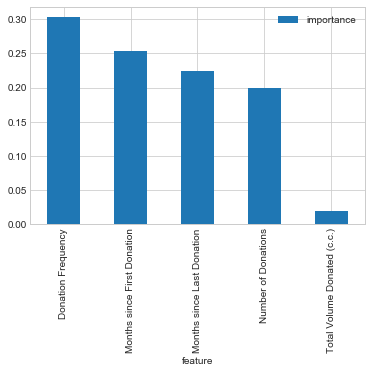

In [97]:
importances.plot.bar()

In [98]:
#Total Volume donated (c.c.) not important, remove from the model

train_data  = train_data.drop("Total Volume Donated (c.c.)", axis=1)
test_data  = test_data.drop("Total Volume Donated (c.c.)", axis=1)

In [99]:
#Training the Random Forest Model again, without the "Total Volume Donated (c.c.)"" column

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.75 %


In [100]:
#Using out-of-bag samples to estimate the generalization accuracy.
#Note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. 

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 76.03999999999999 %


In [101]:
# Random Forest, testing new parameters 

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 77.42999999999999 %


In [102]:
#Finally, running the model on the test data and outputting it

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


0.8697916666666666

In [107]:
#output = pd.DataFrame({'Survival': Y_prediction})

#Submission_Format = pd.read_csv(r"D:\Datasets\Blood Donations\BloodDonationSubmissionFormat.csv")

output = pd.DataFrame({'Made Donation in March 2007': Y_prediction})

output.to_csv('Blood Donation Submission.csv', index=False)

In [108]:
output.head()

,Made Donation in March 2007
0,1
1,0
2,0
3,0
4,1


In [110]:
output.dtypes

Made Donation in March 2007    int64
dtype: object

In [111]:
output['Made Donation in March 2007'] = output['Made Donation in March 2007'].astype(float)

In [112]:
output.to_csv('Blood Donation Submission 2.csv', index=False)

In [139]:
X_train.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donation Frequency
0,2,50,98,1.920000
1,0,13,28,2.153846
2,1,16,35,2.125000
3,2,20,45,2.150000
4,1,24,77,3.166667


In [141]:
X_test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donation Frequency
0,2,12,3,52,4.166667
1,21,7,2,38,2.428571
2,4,1,0,4,0.000000
3,11,11,3,38,2.454545
4,4,12,3,34,2.500000


In [142]:
X_test= X_test.drop("Total Volume Donated (c.c.)", axis=1)
X_test.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donation Frequency
0,2,12,52,4.166667
1,21,7,38,2.428571
2,4,1,4,0.000000
3,11,11,38,2.454545
4,4,12,34,2.500000


In [143]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()

random_forest_regressor.fit(X_train, Y_train)
Y_prediction = random_forest_regressor.predict(X_test)

random_forest_regressor.score(X_train, Y_train)


0.6491287969485255

In [144]:
print(Y_prediction)

[0.8        0.1        0.09271178 0.1        0.4        0.9
 0.2866342  0.         0.         0.         0.8        0.
 0.3        0.09271178 0.8        0.25196248 0.         0.5
 0.1        0.4        0.9        0.65       0.6        0.09271178
 0.         0.6        0.42452381 0.         0.         0.8
 0.6        0.4        0.17324049 0.1        0.         0.
 0.         0.         0.25       0.09271178 0.45896825 0.5
 0.1        0.24166667 0.         0.17324049 0.6        0.
 0.         0.         0.5        0.8        0.2        0.7
 0.         0.2        0.         0.2        0.2        0.1
 0.09271178 0.405      0.2        0.6        0.405      0.1
 0.         0.1        0.26666667 0.09271178 0.         0.5
 0.01944444 0.09271178 0.         0.         0.2        0.4
 0.1        0.2        0.01944444 0.1        0.42452381 0.45896825
 0.5        0.05313685 0.25196248 0.1        0.1        0.3
 0.09271178 0.8        0.         0.025      0.1        0.2
 0.2        0.2        0.225 

In [145]:
output_3 = pd.DataFrame({'Made Donation in March 2007': Y_prediction})

output_3.to_csv('Blood Donation Submission 4.csv', index=False)